In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/rishitha/Desktop/cleaned_gender.csv')

In [4]:
df.head()

,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,0.929512,...,0.133338,0.121968,0.047337,0.277457,0.822656,0.0,4.687500,4.687500,0.076296,male
1,84,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,0.911080,...,0.137433,0.111204,0.047151,0.277457,1.313384,0.0,6.046875,6.046875,0.135811,male
2,85,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,0.936040,...,0.142227,0.118711,0.047013,0.275862,0.593750,0.0,6.539062,6.539062,0.096102,male
3,87,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,0.958362,...,0.133325,0.116200,0.047105,0.279070,0.424922,0.0,5.812500,5.812500,0.081880,male
4,88,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,0.969568,...,0.130487,0.114802,0.047151,0.279070,0.198070,0.0,1.078125,1.078125,0.131579,male


In [5]:
df=df.drop([df.columns[0]],axis=1)
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [6]:
print(df.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [7]:
df.shape

(4361, 21)

In [8]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,0.186093,0.057006,0.190335,0.145796,0.230877,0.085081,1.971404,7.933659,0.915496,0.443468,0.185193,0.186093,0.130606,0.047334,0.277241,0.944215,0.016252,7.105706,7.089454,0.101832
std,0.019862,0.009515,0.026870,0.031776,0.018412,0.028191,0.579158,3.329032,0.025962,0.121583,0.055095,0.019862,0.016937,0.000405,0.002250,0.398433,0.045230,2.963021,2.963914,0.037590
min,0.130253,0.031227,0.107668,0.057482,0.177122,0.020521,0.550830,2.377435,0.838816,0.141281,0.002527,0.130253,0.093660,0.046921,0.271186,0.071470,0.000000,0.375000,0.375000,0.005507
25%,0.172234,0.050947,0.171007,0.122285,0.218621,0.059621,1.546014,5.363785,0.898416,0.355402,0.135029,0.172234,0.118378,0.047013,0.275862,0.641129,0.000000,5.109375,5.109375,0.074496
50%,0.184996,0.058363,0.191987,0.140107,0.232547,0.092520,1.917493,7.170027,0.918524,0.440672,0.192089,0.184996,0.126001,0.047198,0.277457,0.900000,0.000000,6.515625,6.492188,0.097698
75%,0.199711,0.063295,0.210788,0.168432,0.244517,0.108387,2.371233,9.873117,0.934720,0.530726,0.227678,0.199711,0.139656,0.047525,0.279070,1.192127,0.000000,9.140625,9.140625,0.126405
max,0.241377,0.082588,0.257051,0.235086,0.270893,0.150842,3.600165,17.922685,0.973249,0.785258,0.280000,0.241377,0.178343,0.048632,0.279070,2.102571,0.351562,15.210938,15.210938,0.208333


In [9]:
df.label.value_counts()

male      3343
female    1018
Name: label, dtype: int64

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  4361 non-null   float64
 1   sd        4361 non-null   float64
 2   median    4361 non-null   float64
 3   Q25       4361 non-null   float64
 4   Q75       4361 non-null   float64
 5   IQR       4361 non-null   float64
 6   skew      4361 non-null   float64
 7   kurt      4361 non-null   float64
 8   sp.ent    4361 non-null   float64
 9   sfm       4361 non-null   float64
 10  mode      4361 non-null   float64
 11  centroid  4361 non-null   float64
 12  meanfun   4361 non-null   float64
 13  minfun    4361 non-null   float64
 14  maxfun    4361 non-null   float64
 15  meandom   4361 non-null   float64
 16  mindom    4361 non-null   float64
 17  maxdom    4361 non-null   float64
 18  dfrange   4361 non-null   float64
 19  modindx   4361 non-null   float64
 20  label     4361 non-null   obje

In [11]:
dict = {'label':{'male':1,'female':0}}      
df.replace(dict,inplace = True)           
X = df.loc[:, df.columns != 'label']
y = df.loc[:,'label']

<Axes: >

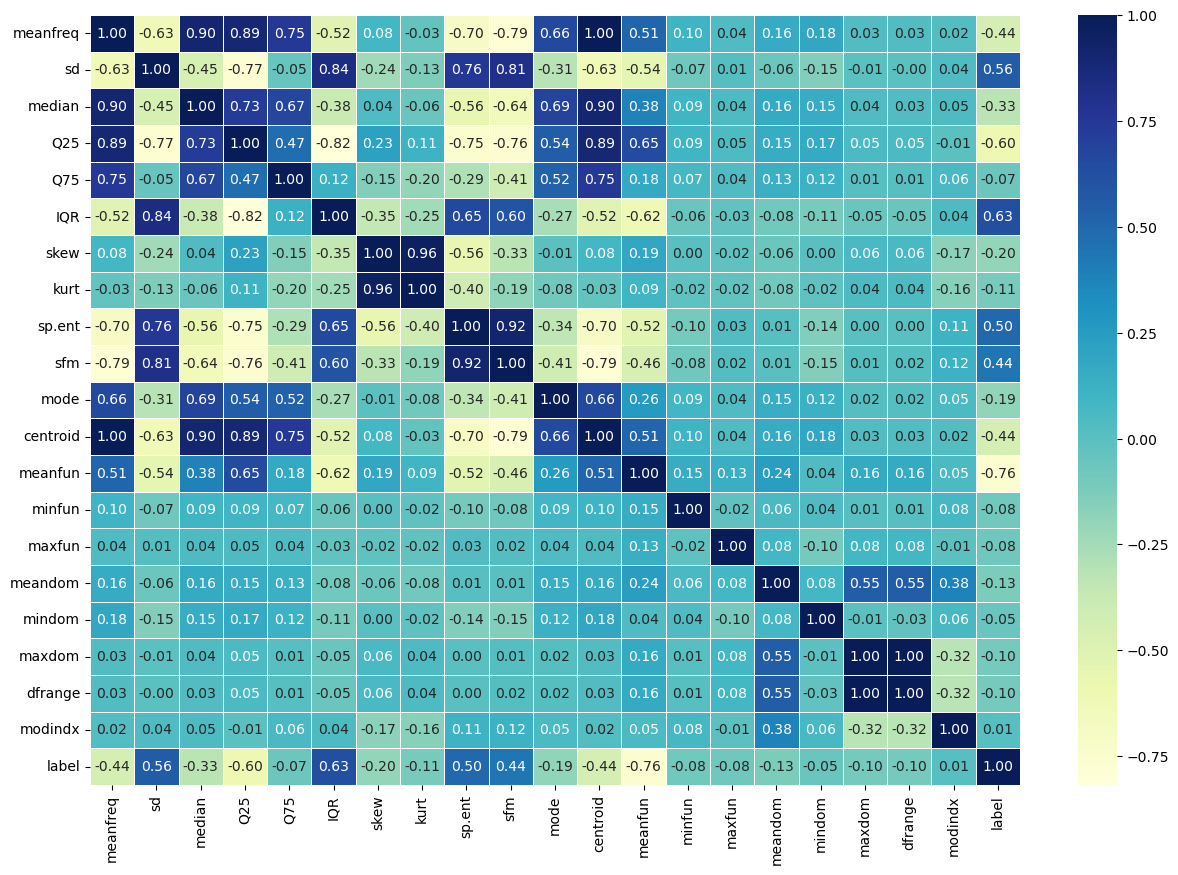

In [12]:
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
model_acc = []

In [15]:
svm_c = 1000
svm_gamma = 0.01

dtc_md = 5

rfc_M = 8
rfc_d = 8
rfc_m = 6

In [16]:
model_acc = []

In [17]:
SVM_model = SVC(C=svm_c, gamma=svm_gamma).fit(X_train, y_train)
train_acc = SVM_model.score(X_train, y_train)
test_acc = SVM_model.score(X_test, y_test)
m = 'SVM'
model_acc.append([m, train_acc, test_acc])

DTC_model = DecisionTreeClassifier(max_depth=dtc_md).fit(X_train, y_train)
train_acc = DTC_model.score(X_train, y_train)
test_acc = DTC_model.score(X_test, y_test)
m = 'Decision Tree Classifier'
model_acc.append([m, train_acc, test_acc])

RFC_model = RandomForestClassifier(n_estimators=rfc_M, max_features=rfc_d, max_depth=rfc_m, random_state=0).fit(X_train, y_train)
train_acc = RFC_model.score(X_train, y_train)
test_acc = RFC_model.score(X_test, y_test)
m = 'Random Forest Classifier'
model_acc.append([m, train_acc, test_acc])

In [18]:
print("Feature importance of Decision Tree Classifier: ")
np.array([X.columns.values.tolist(), list(DTC_model.feature_importances_)]).T

Feature importance of Decision Tree Classifier: 


array([['meanfreq', '0.0035759550132382022'],
       ['sd', '0.04509149898850351'],
       ['median', '0.0'],
       ['Q25', '0.06949826547618046'],
       ['Q75', '0.0'],
       ['IQR', '0.00777132748634325'],
       ['skew', '0.006523063764781604'],
       ['kurt', '0.0'],
       ['sp.ent', '0.0'],
       ['sfm', '0.009592518361043863'],
       ['mode', '0.014665355798177127'],
       ['centroid', '0.0'],
       ['meanfun', '0.8122657045489278'],
       ['minfun', '0.0'],
       ['maxfun', '0.0'],
       ['meandom', '0.01795880385735128'],
       ['mindom', '0.0'],
       ['maxdom', '0.005516986548736532'],
       ['dfrange', '0.0'],
       ['modindx', '0.007540520156716402']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

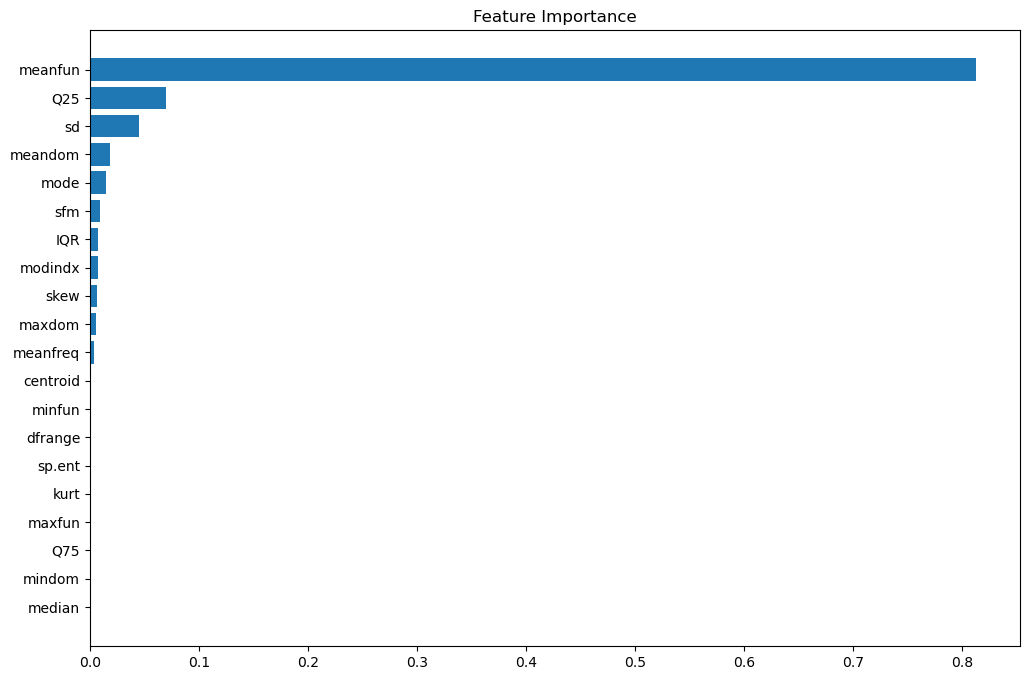

In [19]:
importances = DTC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')

In [20]:
print("Feature importance of Random Forest Classifier: ")
np.array([X.columns.values.tolist(), list(RFC_model.feature_importances_)]).T

Feature importance of Random Forest Classifier: 


array([['meanfreq', '0.0068666680817869976'],
       ['sd', '0.14071287159474782'],
       ['median', '0.014187111969051232'],
       ['Q25', '0.08179557524008164'],
       ['Q75', '0.010198191188538147'],
       ['IQR', '0.10549893041607596'],
       ['skew', '0.005721243805694459'],
       ['kurt', '0.0030271044134218125'],
       ['sp.ent', '0.006322579208326833'],
       ['sfm', '0.008969420861613757'],
       ['mode', '0.014569223532522298'],
       ['centroid', '0.010286431236206003'],
       ['meanfun', '0.5455985705500326'],
       ['minfun', '0.0021278379133654202'],
       ['maxfun', '0.006484301696195069'],
       ['meandom', '0.008627631510668069'],
       ['mindom', '0.0004918511938766297'],
       ['maxdom', '0.011047951965055359'],
       ['dfrange', '0.005315851467503801'],
       ['modindx', '0.012150652155236195']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

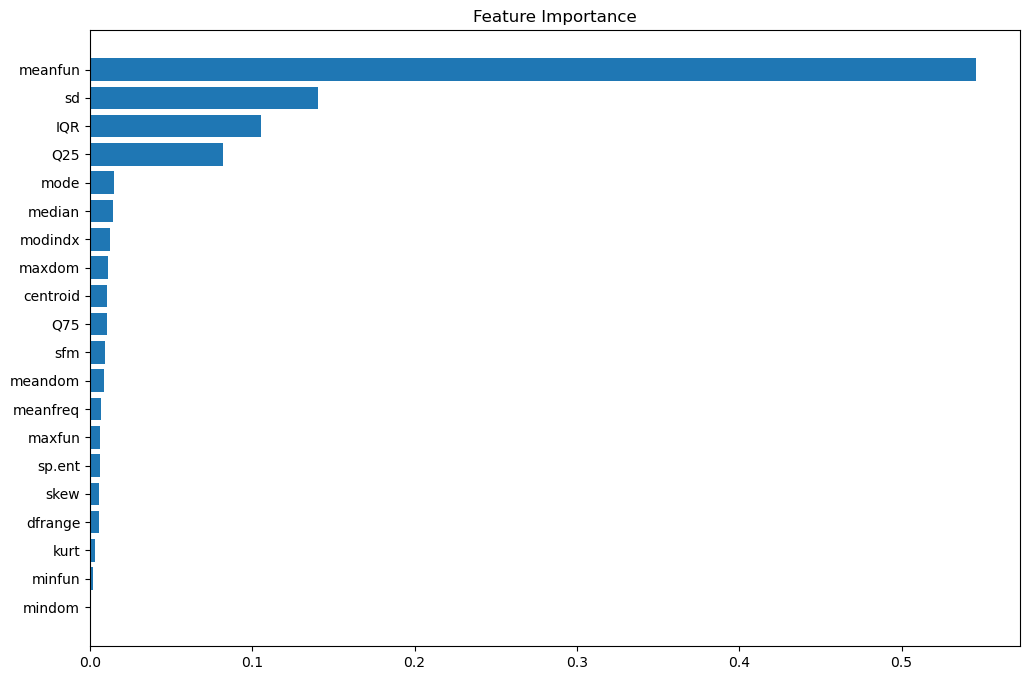

In [21]:
importances = RFC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')

In [22]:
result = pd.DataFrame(model_acc, columns=['Model', 'Training Accuracy', 'Validation Accuracy'])
result[['Model', 'Training Accuracy', 'Validation Accuracy']]

,Model,Training Accuracy,Validation Accuracy
0,SVM,0.933945,0.928506
1,Decision Tree Classifier,0.952599,0.940422
2,Random Forest Classifier,0.963609,0.938588


In [23]:
df_new = df[['meanfun', 'sd', 'Q25', 'IQR','mode','median','label']]
df_new.head()

,meanfun,sd,Q25,IQR,mode,median,label
0,0.121968,0.069304,0.089192,0.106075,0.086962,0.107668,1
1,0.111204,0.058518,0.092841,0.107238,0.101332,0.112037,1
2,0.118711,0.065447,0.093455,0.109455,0.106545,0.112242,1
3,0.116200,0.072849,0.082861,0.120892,0.108583,0.113360,1
4,0.114802,0.070407,0.076098,0.120089,0.101534,0.113418,1


In [24]:
X = df_new.loc[:, df_new.columns != 'label']
y = df_new.loc[:,'label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
feat_rf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0)
feat_his = feat_rf.fit(X_train,y_train)

In [27]:
print(feat_his.score(X_train,y_train))
print(feat_his.score(X_test,y_test))

1.0
0.9404216315307058


In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

anova_filter = SelectKBest(f_classif, k=6)
clf = RandomForestClassifier(n_estimators=rfc_M, max_features=6, max_depth=rfc_m, random_state=0)
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k=6)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, max_features=6,
                                        n_estimators=8, random_state=0))])

In [29]:
print(anova_svm.score(X_train,y_train))
print(anova_svm.score(X_test,y_test))

0.9568807339449541
0.9395050412465628


In [30]:
df = pd.read_csv('C:/Users/rishitha/Desktop/cleaned_age.csv')

In [31]:
df.head()

,Unnamed: 0.1,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,67,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,...,0.133338,0.121968,0.047337,0.277457,0.822656,0.0,4.687500,4.687500,0.076296,young
1,84,85,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,...,0.137433,0.111204,0.047151,0.277457,1.313384,0.0,6.046875,6.046875,0.135811,young
2,85,86,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,...,0.142227,0.118711,0.047013,0.275862,0.593750,0.0,6.539062,6.539062,0.096102,matured
3,87,88,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,...,0.133325,0.116200,0.047105,0.279070,0.424922,0.0,5.812500,5.812500,0.081880,young
4,88,89,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,...,0.130487,0.114802,0.047151,0.279070,0.198070,0.0,1.078125,1.078125,0.131579,matured


In [32]:
df=df.drop([df.columns[0], df.columns[1]],axis=1)
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [33]:
print(df.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [34]:
df.shape

(4361, 21)

In [35]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,0.186093,0.057006,0.190335,0.145796,0.230877,0.085081,1.971404,7.933659,0.915496,0.443468,0.185193,0.186093,0.130606,0.047334,0.277241,0.944215,0.016252,7.105706,7.089454,0.101832
std,0.019862,0.009515,0.026870,0.031776,0.018412,0.028191,0.579158,3.329032,0.025962,0.121583,0.055095,0.019862,0.016937,0.000405,0.002250,0.398433,0.045230,2.963021,2.963914,0.037590
min,0.130253,0.031227,0.107668,0.057482,0.177122,0.020521,0.550830,2.377435,0.838816,0.141281,0.002527,0.130253,0.093660,0.046921,0.271186,0.071470,0.000000,0.375000,0.375000,0.005507
25%,0.172234,0.050947,0.171007,0.122285,0.218621,0.059621,1.546014,5.363785,0.898416,0.355402,0.135029,0.172234,0.118378,0.047013,0.275862,0.641129,0.000000,5.109375,5.109375,0.074496
50%,0.184996,0.058363,0.191987,0.140107,0.232547,0.092520,1.917493,7.170027,0.918524,0.440672,0.192089,0.184996,0.126001,0.047198,0.277457,0.900000,0.000000,6.515625,6.492188,0.097698
75%,0.199711,0.063295,0.210788,0.168432,0.244517,0.108387,2.371233,9.873117,0.934720,0.530726,0.227678,0.199711,0.139656,0.047525,0.279070,1.192127,0.000000,9.140625,9.140625,0.126405
max,0.241377,0.082588,0.257051,0.235086,0.270893,0.150842,3.600165,17.922685,0.973249,0.785258,0.280000,0.241377,0.178343,0.048632,0.279070,2.102571,0.351562,15.210938,15.210938,0.208333


In [36]:
df.label.value_counts()

matured    1983
young      1816
old         562
Name: label, dtype: int64

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  4361 non-null   float64
 1   sd        4361 non-null   float64
 2   median    4361 non-null   float64
 3   Q25       4361 non-null   float64
 4   Q75       4361 non-null   float64
 5   IQR       4361 non-null   float64
 6   skew      4361 non-null   float64
 7   kurt      4361 non-null   float64
 8   sp.ent    4361 non-null   float64
 9   sfm       4361 non-null   float64
 10  mode      4361 non-null   float64
 11  centroid  4361 non-null   float64
 12  meanfun   4361 non-null   float64
 13  minfun    4361 non-null   float64
 14  maxfun    4361 non-null   float64
 15  meandom   4361 non-null   float64
 16  mindom    4361 non-null   float64
 17  maxdom    4361 non-null   float64
 18  dfrange   4361 non-null   float64
 19  modindx   4361 non-null   float64
 20  label     4361 non-null   obje

In [38]:
dict = {'label':{'old':2,'matured':1,'young':0}}      
df.replace(dict,inplace = True)           
X = df.loc[:, df.columns != 'label']
y = df.loc[:,'label']

<Axes: >

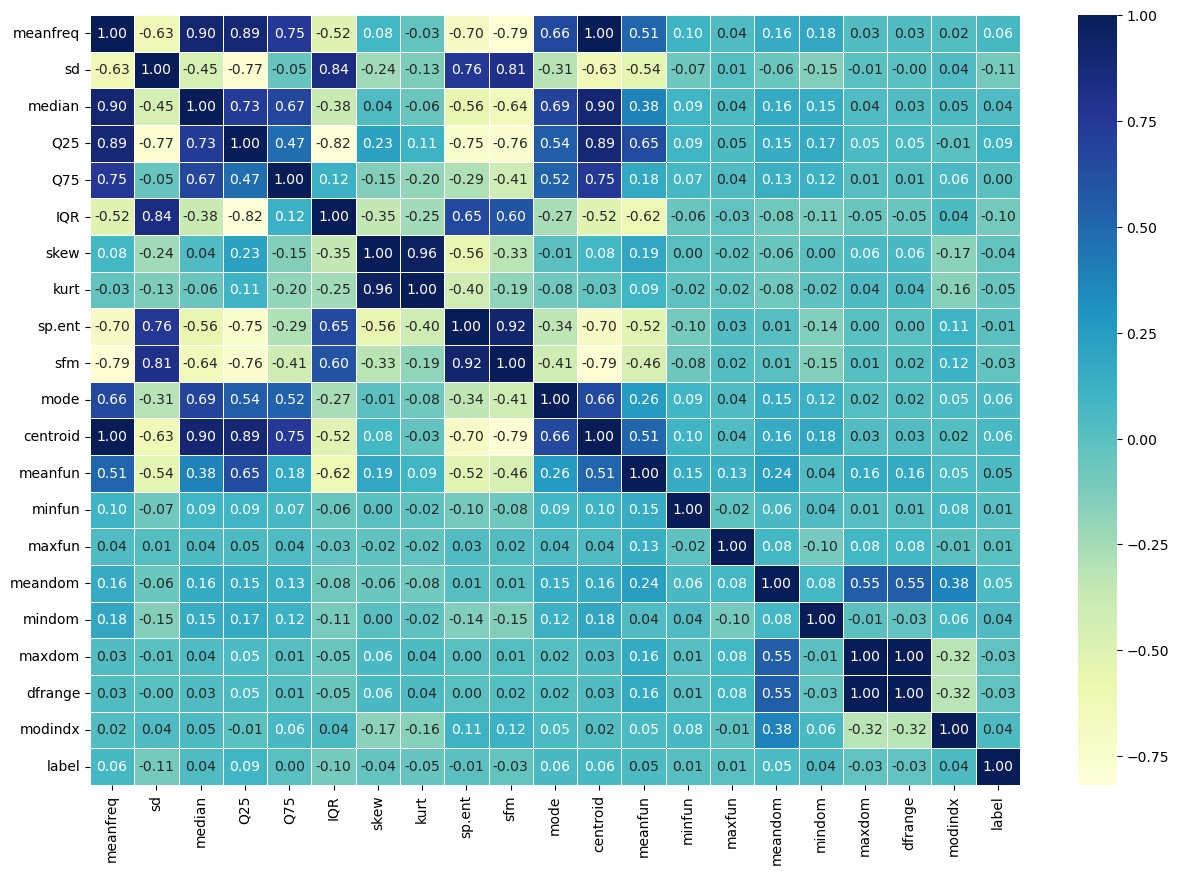

In [39]:
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
model_acc = []

In [42]:
svm_c = 10
svm_gamma = 0.1

dtc_md = 8

rfc_M = 14
rfc_d = 14
rfc_m = 16

In [43]:
SVM_model = SVC(C=svm_c, gamma=svm_gamma).fit(X_train, y_train)
train_acc = SVM_model.score(X_train, y_train)
test_acc = SVM_model.score(X_test, y_test)
m = 'SVM'
model_acc.append([m, train_acc, test_acc])

DTC_model = DecisionTreeClassifier(max_depth=dtc_md).fit(X_train, y_train)
train_acc = DTC_model.score(X_train, y_train)
test_acc = DTC_model.score(X_test, y_test)
m = 'Decision Tree Classifier'
model_acc.append([m, train_acc, test_acc])

RFC_model = RandomForestClassifier(n_estimators=rfc_M, max_features=rfc_d, max_depth=rfc_m, random_state=0).fit(X_train, y_train)
train_acc = RFC_model.score(X_train, y_train)
test_acc = RFC_model.score(X_test, y_test)
m = 'Random Forest Classifier'
model_acc.append([m, train_acc, test_acc])

In [44]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(DTC_model.feature_importances_)]).T

Feature importance: 


array([['meanfreq', '0.05296524102187254'],
       ['sd', '0.06124651155108097'],
       ['median', '0.04374387389159799'],
       ['Q25', '0.1125082409494211'],
       ['Q75', '0.048600930390774316'],
       ['IQR', '0.07457574662112948'],
       ['skew', '0.074280562907234'],
       ['kurt', '0.025379193506290407'],
       ['sp.ent', '0.030075326871479974'],
       ['sfm', '0.13626595375270179'],
       ['mode', '0.06824570842531481'],
       ['centroid', '0.024304711934238787'],
       ['meanfun', '0.058917597525829625'],
       ['minfun', '0.015448166946355466'],
       ['maxfun', '0.011879575917362276'],
       ['meandom', '0.05237572811093334'],
       ['mindom', '0.0'],
       ['maxdom', '0.03582063488563721'],
       ['dfrange', '0.036708967277699185'],
       ['modindx', '0.03665732751304669']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

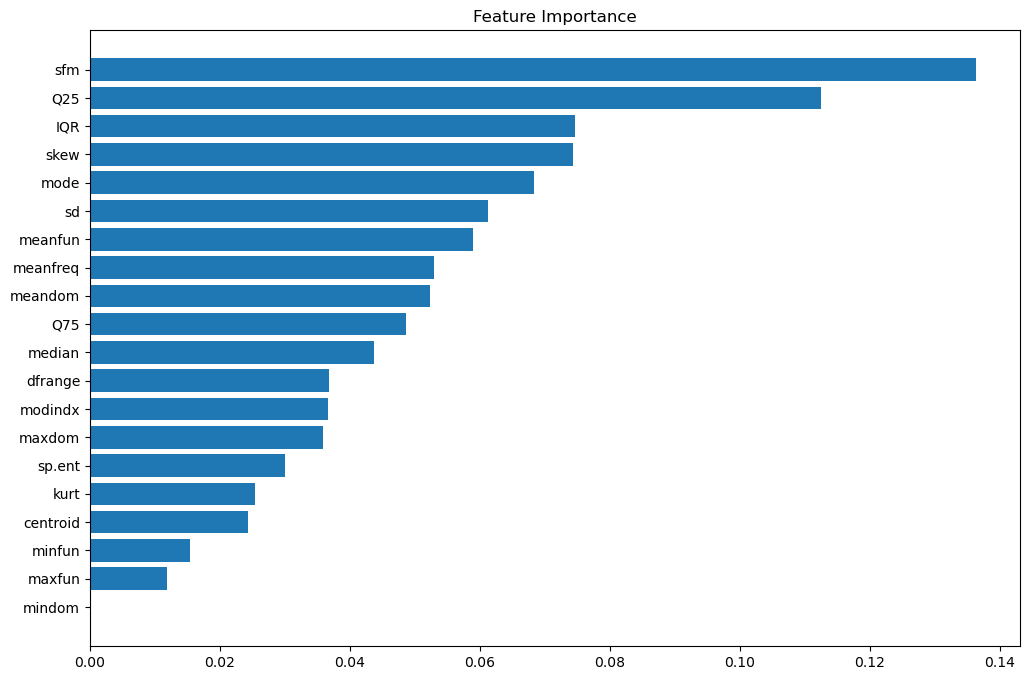

In [45]:
importances = DTC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')

In [46]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(RFC_model.feature_importances_)]).T

Feature importance: 


array([['meanfreq', '0.030886848294810063'],
       ['sd', '0.06516850377004653'],
       ['median', '0.04950487435305695'],
       ['Q25', '0.07162967854049465'],
       ['Q75', '0.049023505328412945'],
       ['IQR', '0.05420457345623346'],
       ['skew', '0.04844510180437566'],
       ['kurt', '0.039714017606279094'],
       ['sp.ent', '0.06186039826089095'],
       ['sfm', '0.07931312478598836'],
       ['mode', '0.06109740078533495'],
       ['centroid', '0.03355718915145917'],
       ['meanfun', '0.0654080950262873'],
       ['minfun', '0.043049244786539445'],
       ['maxfun', '0.016005879102116653'],
       ['meandom', '0.07213595212900939'],
       ['mindom', '0.010150109128609556'],
       ['maxdom', '0.0444980140804477'],
       ['dfrange', '0.04416270167188026'],
       ['modindx', '0.060184787937726913']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

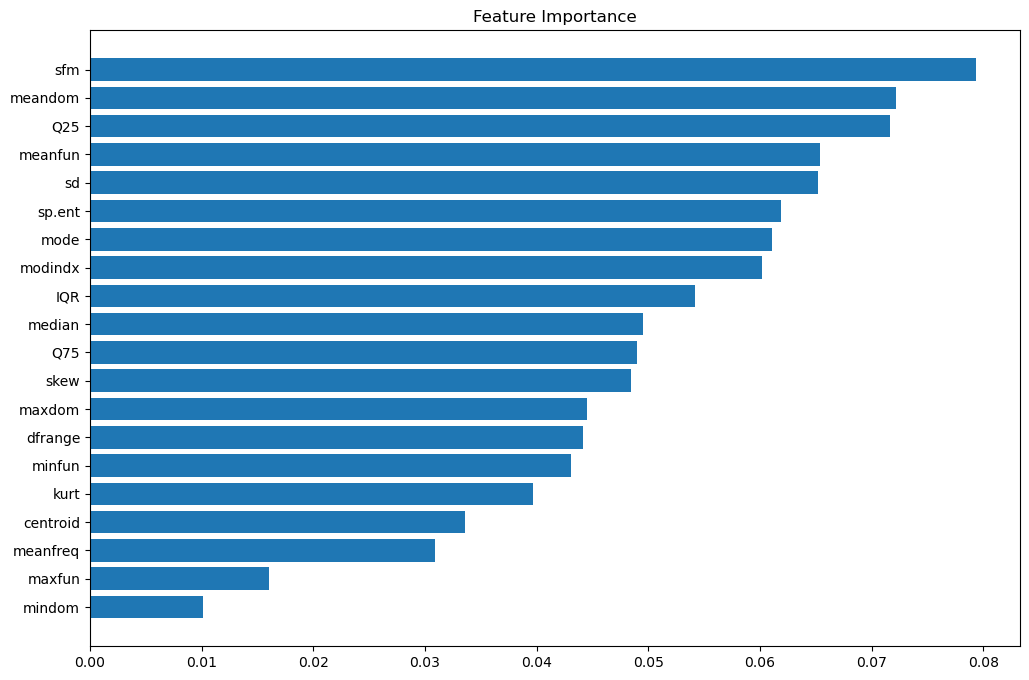

In [47]:
importances = RFC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')

In [48]:
result = pd.DataFrame(model_acc, columns=['Model', 'Training Accuracy', 'Validation Accuracy'])
result[['Model', 'Training Accuracy', 'Validation Accuracy']]

,Model,Training Accuracy,Validation Accuracy
0,SVM,0.551070,0.501375
1,Decision Tree Classifier,0.665138,0.508708
2,Random Forest Classifier,0.976147,0.579285
